## Import Libraries

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import sys
sys.path.append('..')
from src.load import load_data
import pandas as pd
from src.ploter import Ploter
ploter = Ploter()

## Load Data

In [18]:
path_1 = '../Data/raw/creditcard.csv'
path_2 = '../Data/raw/IpAddress_to_Country.csv'
credit_df = load_data(path_1)
ip_df = load_data(path_2)
print(credit_df.shape)
credit_df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning

In [19]:
credit_df.isnull().value_counts() # checking missing values in credit_df

Time   V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
Name: count, dtype: int64

In [20]:
credit_df.duplicated().sum() # Checking Duplicates in credit_df

np.int64(1081)

In [21]:
# Drop Duplicated data
credit_df = credit_df.drop_duplicates()
credit_df.duplicated().sum()

np.int64(0)

In [22]:
credit_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Exploratory Data Analysis(EDA)

In [23]:
credit_df['Class'].value_counts(normalize=True)*100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

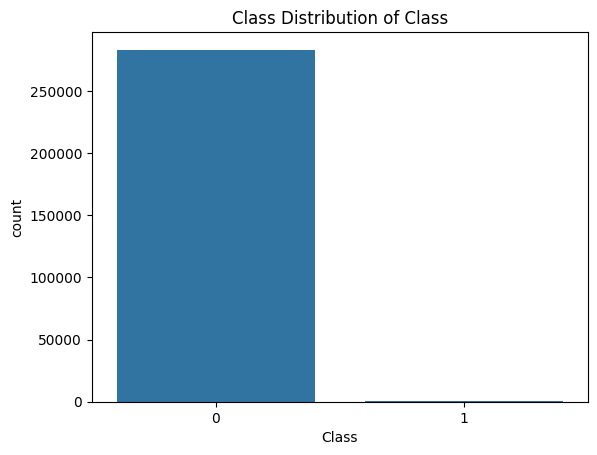

In [24]:
ploter.count_ploter('Class', credit_df) # class Distrbution

## Univariate Analysis

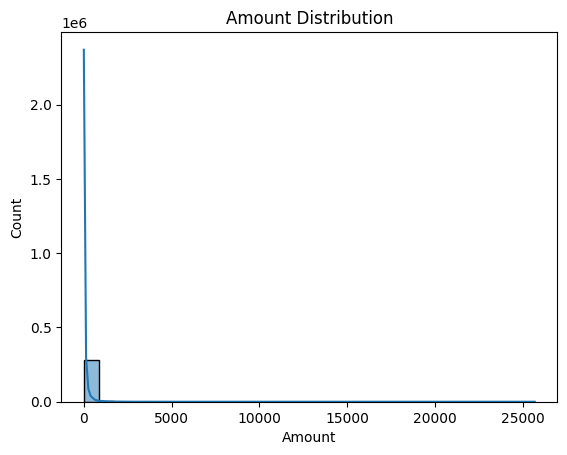

In [25]:
# Amoount value Distribution
ploter.hist_ploter(credit_df['Amount'])

## Bivariate Analysis

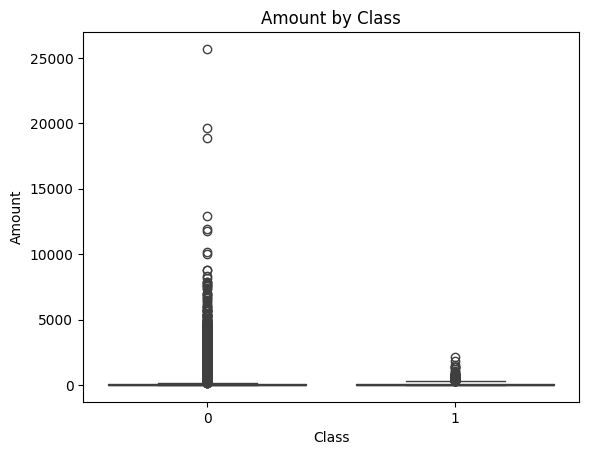

In [26]:
# Purchase Value vs Fraud
ploter.box_ploter('Class', 'Amount', credit_df)

## Feature Engineering

In [27]:
X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

In [28]:
# scale NUMERICAL features
scaler = StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

## Train-Test Split (Stratified)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
y_train.value_counts(normalize=True) * 100

Class
0    99.833466
1     0.166534
Name: proportion, dtype: float64

## Handle Calss Imbalance(SMOTE-Train Only)

In [30]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# Class Distribution Before vs After
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_res.value_counts())


Before SMOTE:
Class
0    226602
1       378
Name: count, dtype: int64

After SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64


## Save Train and Test data

In [32]:
np.save('../Data/processed/x_credit.npy', X)
np.save('../Data/processed/y_credit.npy', y)